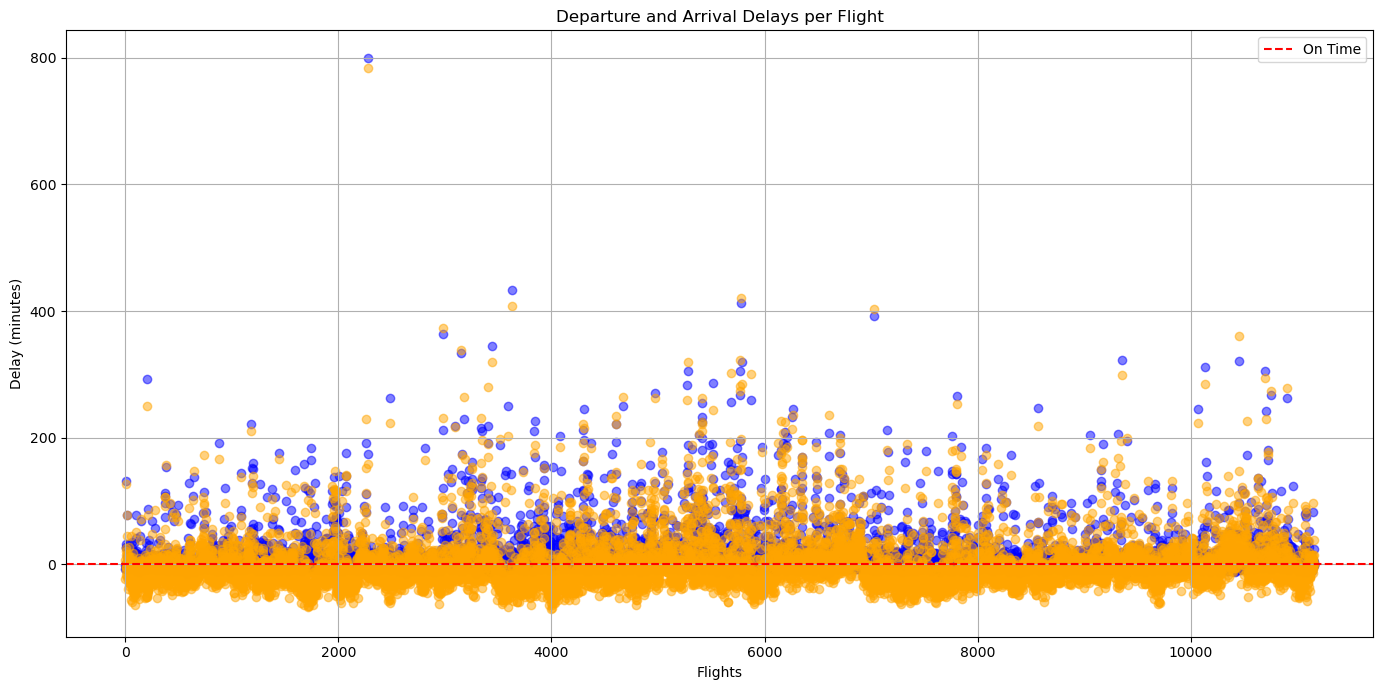

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
file_path = 'FLIGHT_csv_clean.csv'  
NYLA = pd.read_csv(file_path)

# Scatter plot
plt.figure(figsize=(14, 7))

# Titles
plt.title('Departure and Arrival Delays per Flight')
plt.xlabel('Flights')
plt.ylabel('Delay (minutes)')
plt.axhline(0, color='red', linestyle='--', label='On Time')
plt.legend()
plt.grid()
plt.tight_layout()

# Plotting of the departure and arrival delays
plt.scatter(NYLA.index, NYLA['dep_delay'], label='Departure Delay', alpha=0.5, color='blue')
plt.scatter(NYLA.index, NYLA['arr_delay'], label='Arrival Delay', alpha=0.5, color='orange')
plt.show()


In [9]:
# Import CSV again
flight_data = pd.read_csv('FLIGHT_csv_clean.csv') 

# Count number of flights per airline
flight_counts = flight_data['name'].value_counts() 

# Print number of flight per airline
for name, count in flight_counts.items():
    print(f'Total flights for {name}: {count}')

Total flights for American Airlines Inc.: 3187
Total flights for Delta Air Lines Inc.: 2487
Total flights for United Air Lines Inc.: 2037
Total flights for Virgin America: 1779
Total flights for JetBlue Airways: 1669


/var/folders/nh/tj10d_nj0rg27q3sh231hw8r0000gn/T/ipykernel_32134/953701579.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Flights', y='Airline', data=data, palette='viridis')


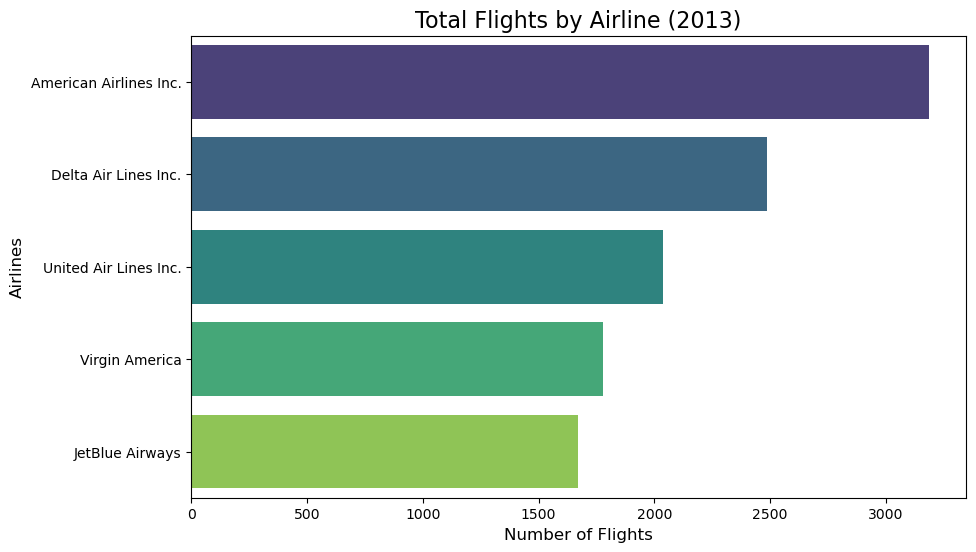

In [16]:
# Preparing
airlines = [
    'American Airlines Inc.',
    'Delta Air Lines Inc.',
    'United Air Lines Inc.',
    'Virgin America',
    'JetBlue Airways'
]

flight_counts = [3187, 2487, 2037, 1779, 1669]

# Create Df
data = pd.DataFrame({
    'Airline': airlines,
    'Total Flights': flight_counts
    })

# Bar chart, titles
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Flights', y='Airline', data=data, palette='viridis')
plt.title('Total Flights by Airline (2013)', fontsize=16)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Airlines', fontsize=12)

# Plot
plt.show()


In [23]:
# Grouping by airline name and calculating mean departure and arrival delay
average_dep_delay_per_airline = NYLA.groupby('name')['dep_delay'].mean().reset_index()
average_arr_delay_per_airline = NYLA.groupby('name')['arr_delay'].mean().reset_index()

# Step 2: Sorting airlines 
average_dep_delay_per_airline = average_dep_delay_per_airline.sort_values(by='dep_delay')
average_arr_delay_per_airline = average_arr_delay_per_airline.sort_values(by='arr_delay')

# Printing 
print("Average departure delay per airline:")
print(average_dep_delay_per_airline)
print("\nAverage arrival delay per airline:")
print(average_arr_delay_per_airline)

Average departure delay per airline:
                     name  dep_delay
1    Delta Air Lines Inc.   5.685565
3   United Air Lines Inc.   7.631811
2         JetBlue Airways   8.938886
0  American Airlines Inc.   9.499216
4          Virgin America  10.947723

Average arrival delay per airline:
                     name  arr_delay
1    Delta Air Lines Inc.  -3.845195
0  American Airlines Inc.  -1.927204
3   United Air Lines Inc.   1.592538
2         JetBlue Airways   2.013781
4          Virgin America   2.100618


    Year  Week  Average Departure Delay  Average Arrival Delay
0   2013     1                 3.497942              -9.757202
1   2013     2                 5.043062              -6.846890
2   2013     3                 1.275362              -9.541063
3   2013     4                 3.293269               3.024038
4   2013     5                 2.495146              -2.679612
5   2013     6                 5.299435              -2.779661
6   2013     7                 6.777778             -11.449275
7   2013     8                 2.803828              -5.038278
8   2013     9                 7.440758             -23.303318
9   2013    10                10.108491              -1.400943
10  2013    11                 5.342593              -8.625000
11  2013    12                 6.752294               3.472477
12  2013    13                 1.330275             -13.032110
13  2013    14                 2.065421              -4.023364
14  2013    15                 8.481651              -1

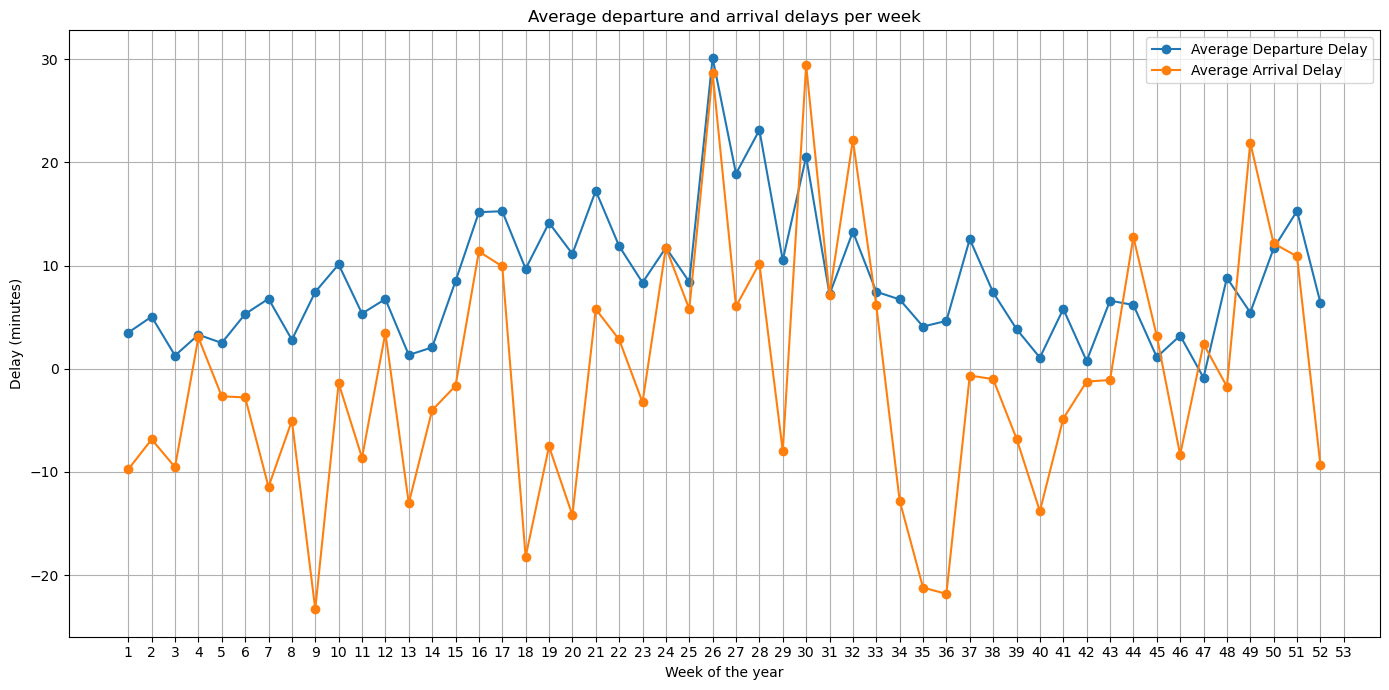

Maximum Average Departure Delay:
Year: 2013.0, Week: 26.0
Max Departure Delay (average): 30.120535714285715
Corresponding Average Arrival Delay: 28.642857142857142

Minimum Average Departure Delay:
Year: 2013.0, Week: 47.0
Min Departure Delay (average): -0.8697674418604651
Corresponding Average Arrival Delay: 2.395348837209302


In [75]:
# Extract week and year from the date column
NYLA['week'] = NYLA['date'].dt.isocalendar().week  
NYLA['year'] = NYLA['date'].dt.year  

# Average delays per week
average_delays_per_week = NYLA.groupby(['year', 'week'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Renaming
average_delays_per_week.columns = ['Year', 'Week', 'Average Departure Delay', 'Average Arrival Delay']

# Print
print(average_delays_per_week)

################################################################################################################

# Visualize delay per week (line chart)
plt.figure(figsize=(14, 7))

plt.plot(average_delays_per_week['Week'], average_delays_per_week['Average Departure Delay'], label='Average Departure Delay', marker='o')
plt.plot(average_delays_per_week['Week'], average_delays_per_week['Average Arrival Delay'], label='Average Arrival Delay', marker='o')

plt.title('Average departure and arrival delays per week')
plt.xlabel('Week of the year')
plt.ylabel('Delay (minutes)')
plt.xticks(range(1, 54))  # Adjust for weeks 1 to 53
plt.legend()
plt.grid()
plt.tight_layout()

# Print
plt.show()

################################################################################################################

# Average departure and arrival delays per week
average_delays_per_week = NYLA.groupby(['year', 'week'])[['dep_delay', 'arr_delay']].mean().reset_index()

# The maximum average departure delay
max_dep_delay_row = average_delays_per_week.loc[average_delays_per_week['dep_delay'].idxmax()]

# Print
print("Maximum Average Departure Delay:")
print(f"Year: {max_dep_delay_row['year']}, Week: {max_dep_delay_row['week']}")
print(f"Max Departure Delay (average): {max_dep_delay_row['dep_delay']}")
print(f"Corresponding Average Arrival Delay: {max_dep_delay_row['arr_delay']}")
print(  )

################################################################################################################

# The minimum average departure delay
min_dep_delay_row = average_delays_per_week.loc[average_delays_per_week['dep_delay'].idxmin()]

# Print
print("Minimum Average Departure Delay:")
print(f"Year: {min_dep_delay_row['year']}, Week: {min_dep_delay_row['week']}")
print(f"Min Departure Delay (average): {min_dep_delay_row['dep_delay']}")
print(f"Corresponding Average Arrival Delay: {min_dep_delay_row['arr_delay']}")

    Year  Month  Average Departure Delay  Average Arrival Delay
0   2013      1                 3.091006              -6.396146
1   2013      2                 4.880952              -8.195489
2   2013      3                 6.238445              -6.568277
3   2013      4                10.208198               2.062567
4   2013      5                12.643678              -6.106583
5   2013      6                15.078834              10.857451
6   2013      7                16.655454               8.628950
7   2013      8                 8.474872               1.026667
8   2013      9                 6.970779              -8.274892
9   2013     10                 3.473465              -2.655567
10  2013     11                 3.303269               0.452086
11  2013     12                 9.388474               8.124867


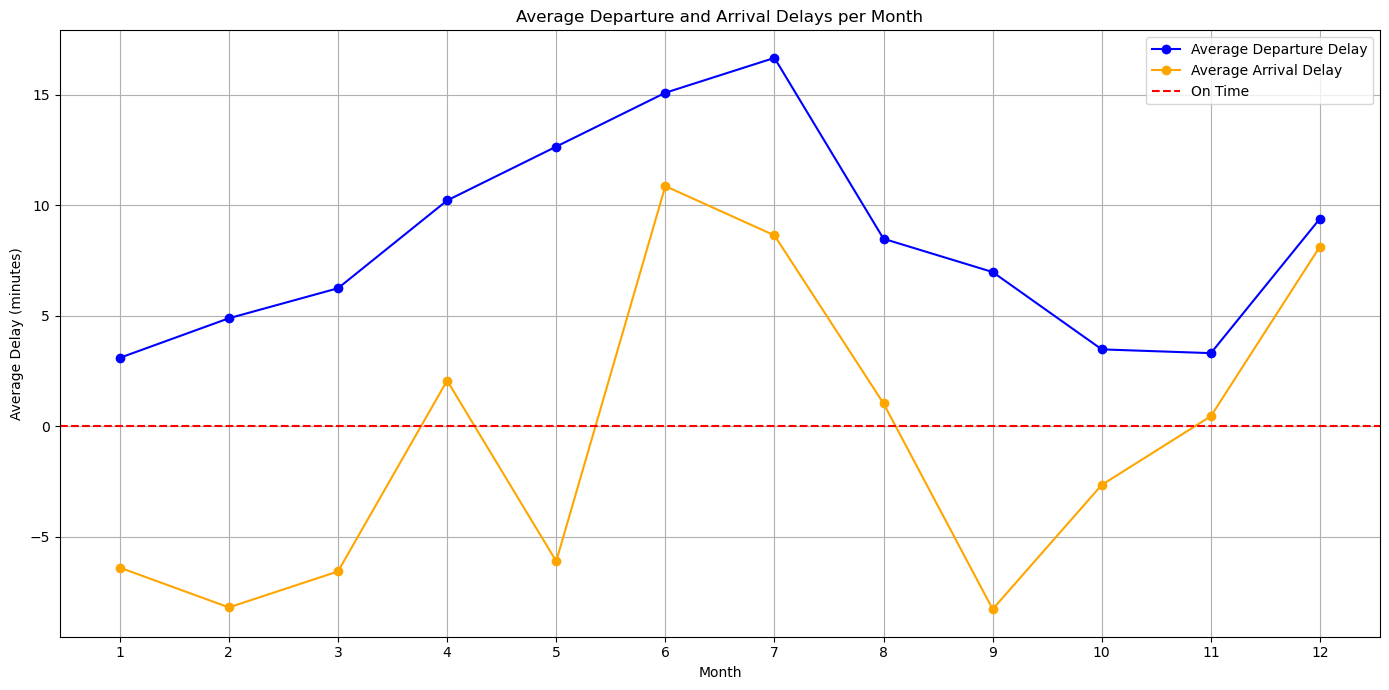

In [58]:
# Extract month and year 
NYLA['month'] = NYLA['date'].dt.month  # Extract month
NYLA['year'] = NYLA['date'].dt.year    # Extract year

# Average delays per month
average_delays_per_month = NYLA.groupby(['year', 'month'])[['dep_delay', 'arr_delay']].mean().reset_index()

# Renaming
average_delays_per_month.columns = ['Year', 'Month', 'Average Departure Delay', 'Average Arrival Delay']

# Print
print(average_delays_per_month)

# # Visualize delay per month (line chart)
plt.figure(figsize=(14, 7))

plt.plot(average_delays_per_month['Month'], average_delays_per_month['Average Departure Delay'], marker='o', label='Average Departure Delay', color='blue')
plt.plot(average_delays_per_month['Month'], average_delays_per_month['Average Arrival Delay'], marker='o', label='Average Arrival Delay', color='orange')

plt.title('Average Departure and Arrival Delays per Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13), [f'{month}' for month in range(1, 13)])  # X-axis labels from 1 to 12
plt.axhline(0, color='red', linestyle='--', label='On Time')  # Reference line for on-time flights
plt.legend()
plt.grid()
plt.tight_layout()

# Print 
plt.show()